# DEMO Notebook - making plots without a viewer connected
<h2>Using imexam inside a Jupyter notebook with DS9 as your viewer</h2>
<p align="left">You can also use the imexam plotting libraray without loading a viewer. </p>

<p align="left">This and other demo notebooks can be found on the SpaceTelescope github site: https://github.com/spacetelescope/imexam/ </p>


<h3>If you want the plots to show up inside of the notebook execute the following cell:

In [1]:
%matplotlib notebook

In [2]:
from imexam.imexamine import Imexamine
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plots=Imexamine() #initalize the object to get access to the plotting functions

In [4]:
dir(plots) #the plots object now has access to these

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_user_function',
 '_aperture_phot',
 '_close_plots',
 '_data',
 '_datafile',
 '_define_default_pars',
 '_define_local_pars',
 '_figure_name',
 '_fit_models',
 '_plot_windows',
 '_reserved_keys',
 'aper_phot',
 'aper_phot_def_pars',
 'aper_phot_pars',
 'close',
 'colplot_def_pars',
 'colplot_pars',
 'column_fit',
 'column_fit_def_pars',
 'column_fit_pars',
 'contour',
 'contour_def_pars',
 'contour_pars',
 'curve_of_growth',
 'curve_of_growth_def_pars',
 'curve_of_growth_pars',
 'cutout',
 'cutout_def_pars',
 'cutout_pars',
 'do_option',
 'gauss_center',
 'get_options',
 'get_plot_name',
 'histogram',
 'histogram_def_pars',
 'histogram_par

In [5]:
#make a random piece of data
data=np.random.rand(100,100)

<IPython.core.display.Javascript object>


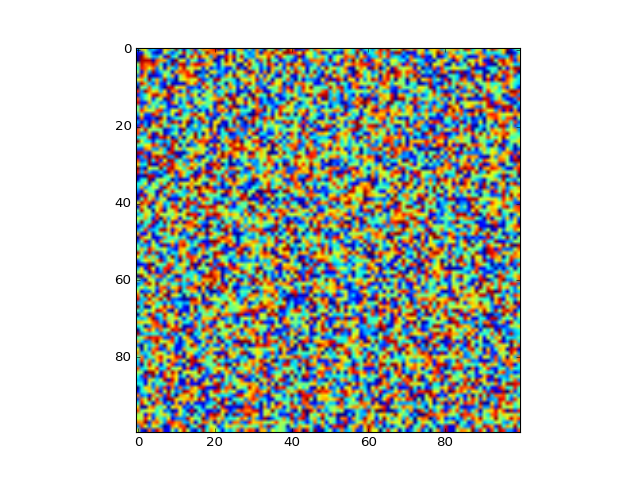

In [6]:
plt.imshow(data)

<h2> All the plotting functions will accept (x, y, data), but you can also point the plotting object
to your data and it will use that by default </h2>

In [7]:
plots.set_data(data) #point to your data object if you don't want to always supply it

Line at 10 10


<IPython.core.display.Javascript object>


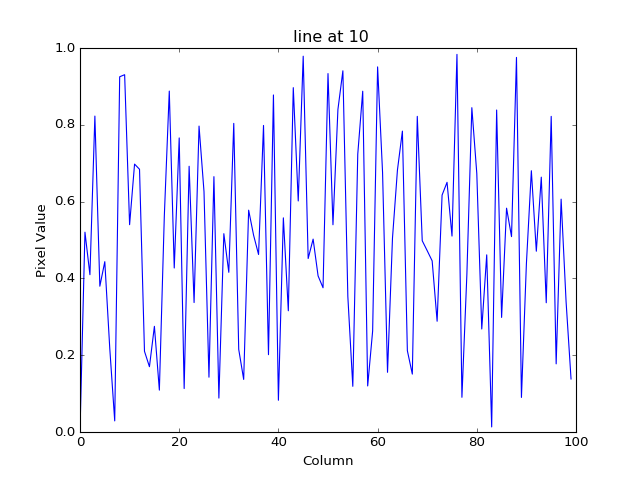

In [8]:
plots.plot_line(10,10)

<IPython.core.display.Javascript object>


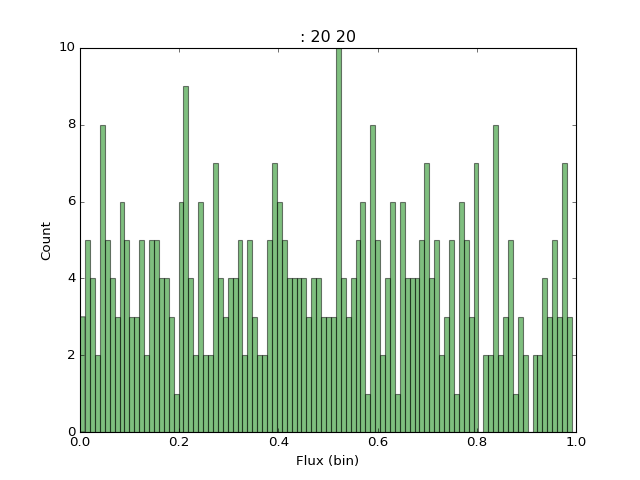

100 bins range:[0.0005034279061570945,0.9915968661366276]


In [9]:
plots.histogram(20,20)

<IPython.core.display.Javascript object>


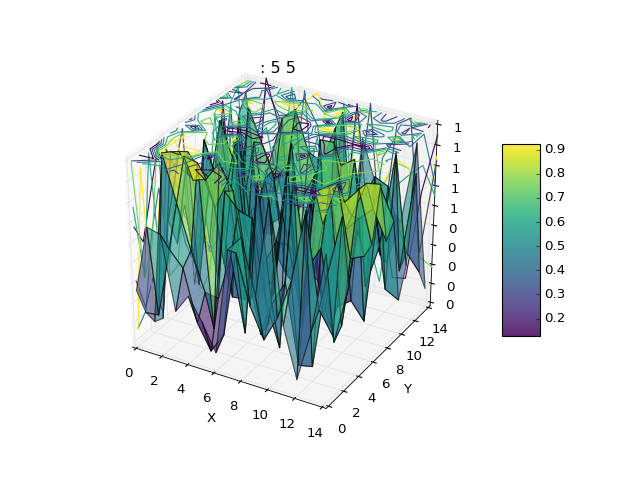

In [10]:
plots.surface(5,5)

<IPython.core.display.Javascript object>


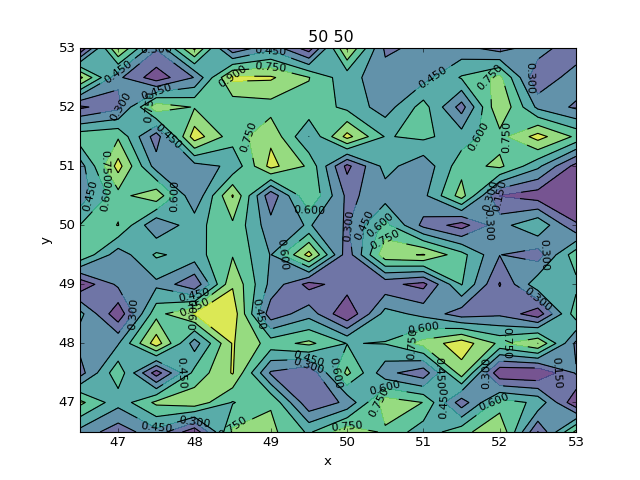

contour centered at: 50 50


In [11]:
plots.contour(50,50)

Column at 34 56


<IPython.core.display.Javascript object>


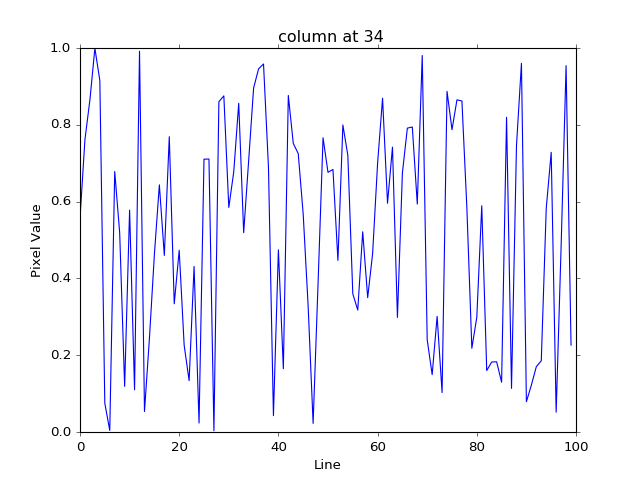

In [12]:
plots.plot_column(34,56)

<h2>If you want to save the figure, remember that you need to save it before you hit the close button on the widget so that we don't loose the reference.</h2>

<IPython.core.display.Javascript object>


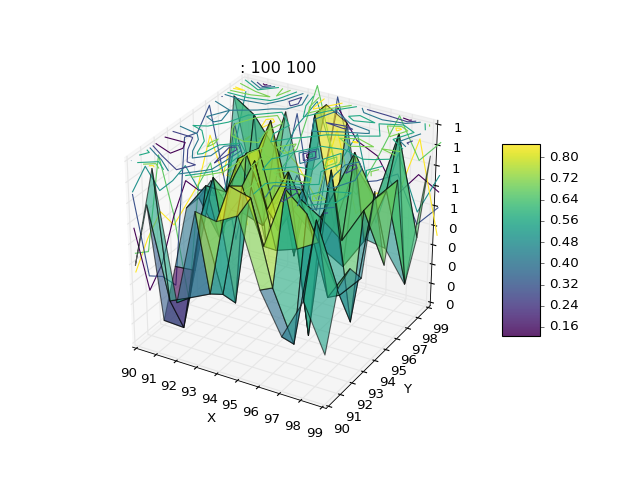

In [15]:
#Lets make another plot to try this out
plots.surface(100,100)

<IPython.core.display.Javascript object>


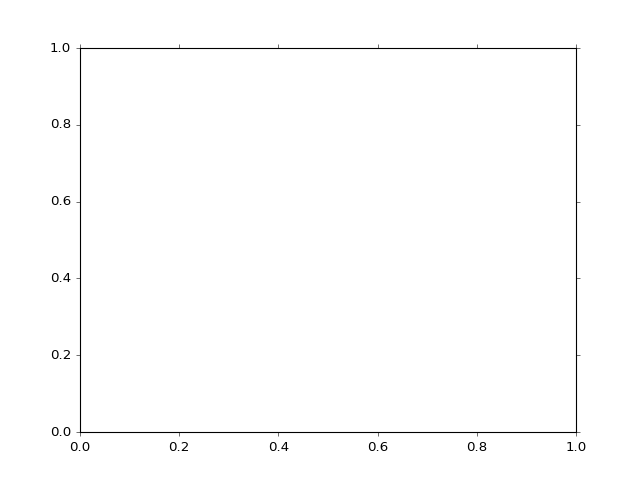

plot saved to surface.png


In [16]:
#remember in the notebook like this, you need to save the figure before you quit it 
#by pressing the off button in the gui, that's why this plot is blank
plots.save('surface.png')

In [17]:
!open surface.png